1. **Datos Simulados de Supervivencia:**
   - Genera un conjunto de datos simulados que represente el tiempo hasta un evento de interés, como la supervivencia de pacientes después de un tratamiento médico. (No tiene que tener un tema específico)
   - Cada fila del conjunto de datos podría representar un paciente, con columnas que incluyan la duración de seguimiento, el estado del paciente (censurado o no censurado), variables predictoras como la edad, el sexo, etc.
   - Utiliza bibliotecas como `numpy` y `pandas` para generar y estructurar los datos simulados.

In [8]:
import numpy as np
import pandas as pd
np.random.seed(42)  
n = 100  
follow_up_duration = np.random.exponential(scale=100, size=n) 
censoring = np.random.binomial(1, 0.5, n)  
ages = np.random.randint(30, 70, size=n)  
sex = np.random.choice(['Male', 'Female'], size=n)  
df = pd.DataFrame({
    'Follow_Up_Duration': follow_up_duration,
    'Censoring_Status': censoring,
    'Age': ages,
    'Sex': sex
})
df.head()

,Follow_Up_Duration,Censoring_Status,Age,Sex
0,46.926809,0,53,Female
1,301.012143,1,40,Female
2,131.674569,0,37,Female
3,91.294255,1,65,Male
4,16.962487,1,67,Male


2. **Análisis Exploratorio de Datos de Supervivencia:**
   - Utiliza la biblioteca `lifelines` para cargar y explorar los datos de supervivencia simulados.
   - Grafica la función de supervivencia y la función de riesgo acumulado para entender la distribución de los tiempos de supervivencia en el conjunto de datos.
   - Examina la proporción de datos censurados y discute su impacto en el análisis.

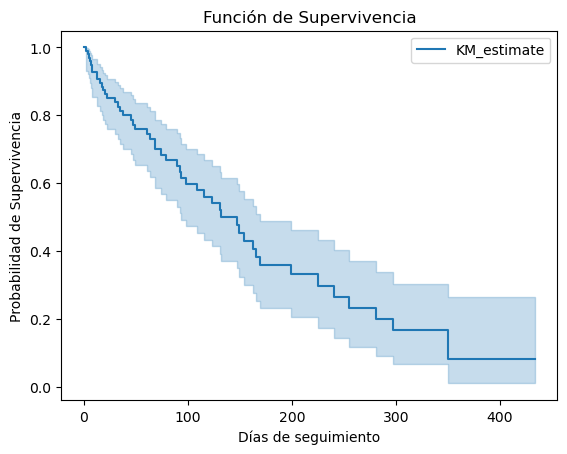

Proporción de datos censurados: 0.51


In [5]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
kmf = KaplanMeierFitter()
T = df['Follow_Up_Duration']
E = df['Censoring_Status'].apply(lambda x: 1 if x == 0 else 0)
kmf.fit(T, event_observed=E)
kmf.plot_survival_function()
plt.title('Función de Supervivencia')
plt.xlabel('Días de seguimiento')
plt.ylabel('Probabilidad de Supervivencia')
plt.show()
censoring_rate = df['Censoring_Status'].mean()
print(f"Proporción de datos censurados: {censoring_rate}")


3. **Comparación de Grupos:**
   - Ajusta modelos de Kaplan-Meier para cada grupo.

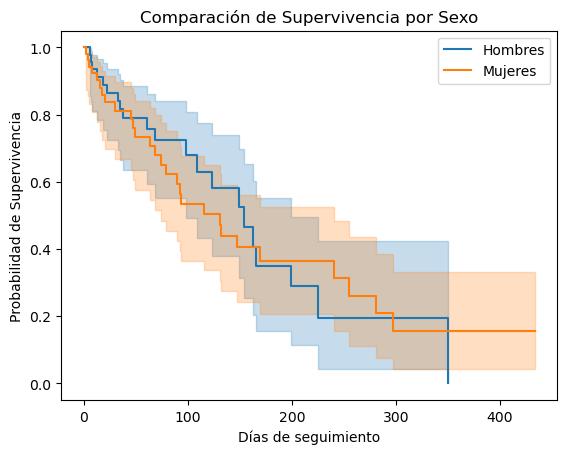

In [6]:
kmf_male = KaplanMeierFitter()
kmf_female = KaplanMeierFitter()
male_data = df[df['Sex'] == 'Male']
T_male = male_data['Follow_Up_Duration']
E_male = male_data['Censoring_Status'].apply(lambda x: 1 if x == 0 else 0)
female_data = df[df['Sex'] == 'Female']
T_female = female_data['Follow_Up_Duration']
E_female = female_data['Censoring_Status'].apply(lambda x: 1 if x == 0 else 0)
kmf_male.fit(T_male, E_male, label='Hombres')
kmf_female.fit(T_female, E_female, label='Mujeres')
ax = kmf_male.plot_survival_function()
kmf_female.plot_survival_function(ax=ax)
plt.title('Comparación de Supervivencia por Sexo')
plt.xlabel('Días de seguimiento')
plt.ylabel('Probabilidad de Supervivencia')
plt.show()


4. **Modelado de Supervivencia:**
   - Ajusta un modelo de regresión de Cox utilizando la función `CoxPHFitter` de `lifelines`.
   - Evalúa la proporcionalidad de riesgos utilizando pruebas como la prueba de proporcionalidad de Cox.

<lifelines.CoxPHFitter: fitted with 100 total observations, 51 right-censored observations>
             duration col = 'Follow_Up_Duration'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 49
   partial log-likelihood = -176.83
         time fit was run = 2024-06-03 18:24:51 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Age        -0.00       1.00       0.01            -0.03             0.02                 0.97                 1.02
Sex        -0.08       0.92       0.29            -0.65             0.49                 0.52                 1.63

            cmp to     z    p   -log2(p)
covariate                               
Age           0.00 -0.28 0.78       0.36
Sex           0.00 -0.28 0.78       0.36
---
Concordance = 0.52
Partial AIC = 357.66
log-likelihood ratio test = 0.17 on 2 df
-log2(p) of ll-ratio test = 0.12

Proportional hazard assumption looks okay.


[]

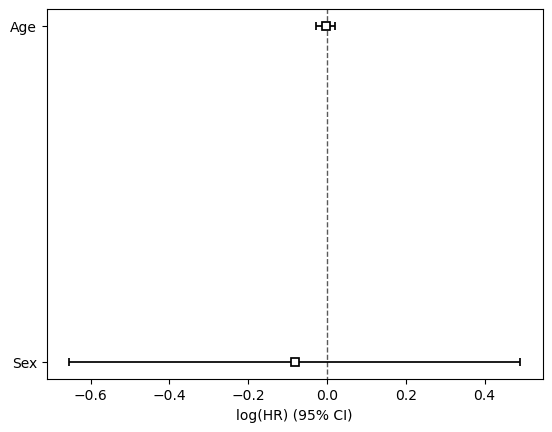

In [7]:
from lifelines import CoxPHFitter
df['Event'] = df['Censoring_Status'].apply(lambda x: 1 if x == 0 else 0)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'Male' else 0) 
cph = CoxPHFitter()
cph.fit(df[['Follow_Up_Duration', 'Event', 'Age', 'Sex']], duration_col='Follow_Up_Duration', event_col='Event')
cph.print_summary()  
cph.plot() 
cph.check_assumptions(df[['Follow_Up_Duration', 'Event', 'Age', 'Sex']], p_value_threshold=0.05)


5. **Interpretación de Resultados:**
   - Discute las diferencias en los tiempos de supervivencia entre los grupos y las variables predictoras significativas identificadas en el modelo de regresión de Cox.
   - Comenta sobre las limitaciones del análisis y posibles pasos futuros, como la validación externa del modelo y la interpretación de los resultados clínicos.


Los datos muestran un patrón de supervivencia que disminuye con el tiempo con alta censura, lo cual es común en estudios de supervivencia donde muchos sujetos pueden salir del estudio o aún estar vivos al final del período de seguimiento.
La comparación por sexo revela algunas diferencias en la supervivencia, aunque estas no son estadísticamente significativas en el modelo de Cox. Esto puede ser debido a una falta de potencia estadística o a que otras variables no incluidas en el modelo puedan estar influyendo en la supervivencia.
El modelo de Cox aplicado no demostró ser muy fuerte en predecir la supervivencia basado en las variables de edad y sexo, lo que sugiere que se podrían explorar otros factores o modelos más complejos para mejorar la predicción y entender mejor las dinámicas de supervivencia en esta población.